## Extracting Stock Data Using a Python Library -> Lab

In [1]:
import yfinance as yf
import pandas as pd

### Using the yfinance Library to Extract Stock Data

In [8]:
#using the ticker
apple = yf.Ticker("AAPL")
print(apple)

yfinance.Ticker object <AAPL>


Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

### Stock Info

In [6]:
# get stock info
apple.info

{'regularMarketPrice': None, 'logo_url': ''}

In [9]:
# get historical market data
apple.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16,0.087894,0.087894,0.087461,0.087461,105728000,0.0,0.0
1980-12-17,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-24,193.410004,194.910004,192.250000,192.750000,45377800,0.0,0.0
2023-07-25,193.330002,194.440002,192.919998,193.619995,37283200,0.0,0.0
2023-07-26,193.669998,195.639999,193.320007,194.500000,47471900,0.0,0.0


In [10]:
# show actions (dividends, splits)
apple.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2022-05-06,0.230000,0.0
2022-08-05,0.230000,0.0
2022-11-04,0.230000,0.0


### Extracting Share Price

A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [20]:
apple_share_price_data = apple.history(period="max")

In [21]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.

In [22]:
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980-12-15,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980-12-16,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
3,1980-12-17,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,1980-12-18,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


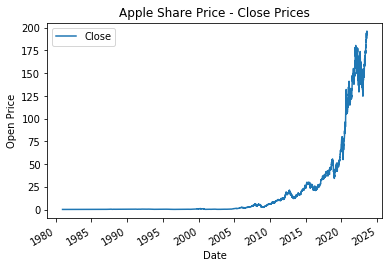

In [24]:
import matplotlib.pyplot as plt

#We can plot the Open price against the Date:
apple_share_price_data.plot(x="Date", y="Close")

# Set plot title and axis labels
plt.title('Apple Share Price - Close Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')

# Show the plot
plt.show()

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [25]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2022-05-06    0.230000
2022-08-05    0.230000
2022-11-04    0.230000
2023-02-10    0.230000
2023-05-12    0.240000
Name: Dividends, Length: 79, dtype: float64

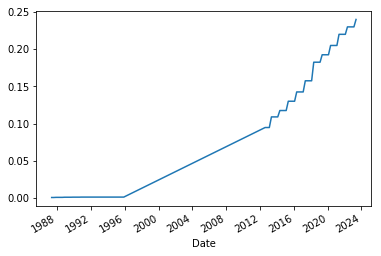

In [26]:
apple.dividends.plot()